# How to run SPAMM

The only required inputs to run `SPAMM` are:
1. A source AGN spectrum
2. A list of which components to fit

However, there are numerous optional input arguments available. Since there are dozens of optional parameters, they have been separated out into a configuration file, `parameters.yaml`. An example default file is provided in `spamm/utils/parameters.yaml`. Users will want to modify this file or create their own with the same format. Any parameters file can be specified at runtime- if one is not found, the default will be used.

## Getting Started

`SPAMM` can accept the required input spectrum in three different forms: 
1. `spamm.Spectrum` instance
2. `specutils.Spectrum1D` instance
3. tuple containing the wavelength and flux and optionally, the error on the flux

All three methods will be shown below.

The list of acceptable components to fit are listed below (they are case insensitive):
- `PL` (Nuclear Continuum)
- `FE` (Iron Forect)
- `HOST` (Host Galaxy)
- `BC` (Balmer Continuum)
- `BPC` (Balmer Pseudo Continuum)
- `NEL` (Narrow Emission Lines)
- `CALZETTI_EXT` (Calzetti extinction curves)
- `SMC_EXT` (Small Magellanic Cloud extinction curves)
- `LMC_EXT` (Large Magellanic Cloud extinction curves)
- `MW_EXT` (Milky Way extinction curves)
- `AGN_EXT` (AGN extinction curves)

For all of our examples, we'll just use the Nuclear Continuum/Power Law component so that computation time is fast.

### From a `spamm.Spectrum` instance

In [1]:
%config InlineBackend.figure_format = "retina"
%matplotlib inline

import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import astropy.units as u

from spamm.run_spamm import spamm
from spamm.Spectrum import Spectrum

In [80]:
# Define the unit-less wavelength and flux
wavelength = np.arange(1000., 3000.)

# Just generate a simple sample power law for a spectrum
def powerlaw(x, amplitude=1.5e-17, x_0=2000., alpha=2.0):
    return amplitude*(x/x_0)**(-alpha)
    
flux = powerlaw(wavelength)

# Make the error 5% of the flux array 
flux_error = flux * 0.05

# If no wavelength and flux units are provided upon instantiation, 
# they will be retrieved from the parameters.yaml file.
inspectrum = Spectrum(spectral_axis=wavelength, flux=flux, flux_error=flux_error,
                      spectral_axis_unit=u.AA, flux_unit=u.Unit('erg cm-2 s-1 AA-1'))

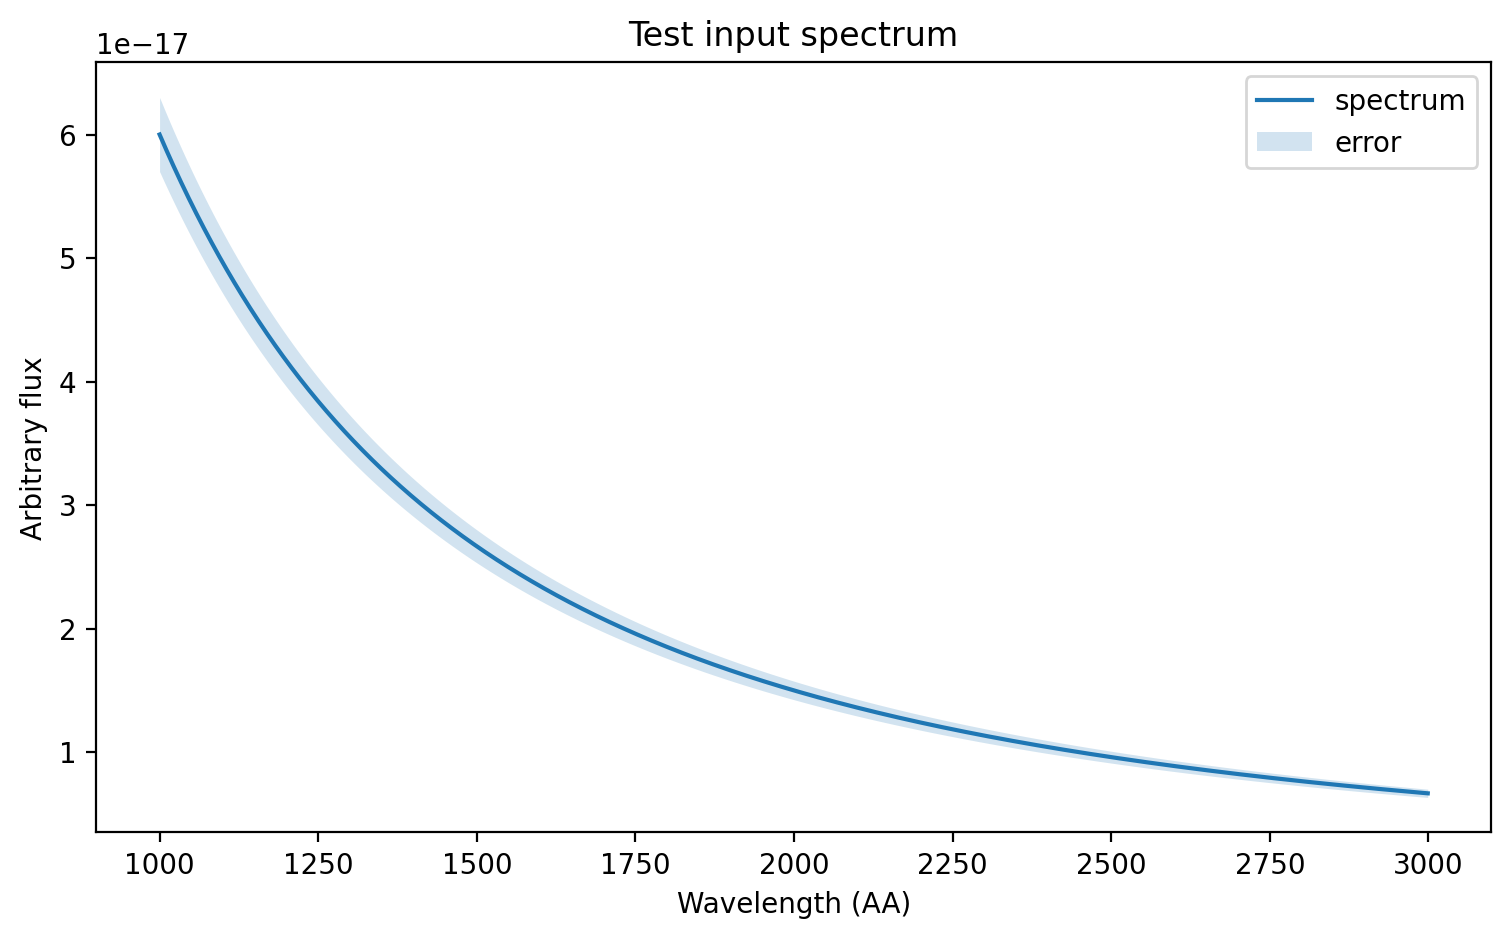

In [81]:
fig = plt.figure(figsize=(9,5))
plt.plot(wavelength, flux, label='spectrum')
plt.fill_between(wavelength, flux - flux_error, flux + flux_error, color='C0', alpha=0.2, lw=0, label='error')

plt.xlabel("Wavelength (AA)")
plt.ylabel("Arbitrary flux")
plt.title("Test input spectrum")
plt.legend();

In [4]:
# Let's fit only the Nuclear Continuum component.
spamm_out = spamm(complist=["PL"], inspectrum=inspectrum)

100%|████████████████████████████████████████| 500/500 [00:03<00:00, 150.97it/s]


Mean acceptance fraction: 0.666
Saved pickle file 20231211_3723/model_20231211_3723.pickle.gz
Plotting the sample projections.
	Saved model_20231211_3723_triangle.png
Plotting the MCMC chains.
	Saved model_20231211_3723_chain.png
Plotting the model posterior PDFs.
	Saved model_20231211_3723_posterior.png
Saved 20231211_3723/model_20231211_3723_posterior.pdf
Execution time: 4.024 seconds


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

### From a `specutils.Spectrum1D` instance
The most important thing to note when starting from a `specutils.Spectrum1D` object is that `Spectrum1D` requires the wavelength and flux arrays to be `astropy.unit.Quantity` objects. While an input uncertainty is an optional parameter when instantiating `Spectrum1D`, it is required when instantiating a `spamm.Spectrum` object and therefore should be passed into `Spectrum1D` before using `spamm`. 
`Spectrum1D` requires the uncertainty to be an `astropy.nddata.NDUncertainty` object.

In [5]:
from specutils import Spectrum1D
from astropy.nddata import StdDevUncertainty

In [6]:
# specutils.Spectrum1D objects must be instantiated with units.
wavelength_q = wavelength * u.AA
flux_q = flux * u.Unit('erg cm-2 s-1 AA-1')
flux_error_q = flux_q * 0.05
# Explicit array and unit arguments are shown below to illustrate how they are passed in.
uncertainty = StdDevUncertainty(flux_error_q.value, unit=flux_error_q.unit)

In [7]:
inspectrum = Spectrum1D(spectral_axis=wavelength_q, flux=flux_q, uncertainty=uncertainty)
spamm_out = spamm(complist=["PL"], inspectrum=inspectrum)

100%|████████████████████████████████████████| 500/500 [00:03<00:00, 132.54it/s]


Mean acceptance fraction: 0.661
Saved pickle file 20231211_3728/model_20231211_3728.pickle.gz
Plotting the sample projections.
	Saved model_20231211_3728_triangle.png
Plotting the MCMC chains.
	Saved model_20231211_3728_chain.png
Plotting the model posterior PDFs.
	Saved model_20231211_3728_posterior.png
Saved 20231211_3728/model_20231211_3728_posterior.pdf
Execution time: 4.369 seconds


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

### From a tuple

In [8]:
# Create a tuple with the wavelength, flux, and flux error arrays. 
intup = (wavelength, flux, flux_error)

In [9]:
# Note that when the input spectrum is defined as a tuple, 
# the wavelength and flux units will be retrieved from the parameters file.
spamm_out = spamm(complist=["PL"], inspectrum=intup)

100%|████████████████████████████████████████| 500/500 [00:03<00:00, 144.15it/s]


Mean acceptance fraction: 0.655
Saved pickle file 20231211_3732/model_20231211_3732.pickle.gz
Plotting the sample projections.
	Saved model_20231211_3732_triangle.png
Plotting the MCMC chains.
	Saved model_20231211_3732_chain.png
Plotting the model posterior PDFs.
	Saved model_20231211_3732_posterior.png
Saved 20231211_3732/model_20231211_3732_posterior.pdf
Execution time: 3.912 seconds


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

### Specifying an input parameters file
An input `parameters.yaml` can be specified on runtime using the `par_file` argument. If one is not specified, the default file will be used.

In [10]:
# Uncomment this if you want to try it.
#spamm_out = spamm(complist=["PL"], inspectrum=inspectrum, par_file="path/to/my/parameters.yaml")

### Specifying output file names and locations
There are several output files (see below); it is possible to change their default names and locations. For the output pickle file:

In [11]:
# You can choose to include the extension name or not, both options below are acceptable.
#spamm_out = spamm(complist=["PL"], inspectrum=inspectrum, picklefile="mypicklefile")
#spamm_out = spamm(complist=["PL"], inspectrum=inspectrum, picklefile="mypicklefile.pickle.gz")

The output directory need not exist, it will be created if necessary. To change the directory where the pickle file and plots will be written:

In [12]:
#spamm_out = spamm(complist=["PL"], inspectrum=inspectrum, outdir="/path/to/my/output", picklefile="mypicklefile")

### MCMC input arguments
You can also specify the number of walkers and iterations for `emcee` ([documentation here](https://emcee.readthedocs.io/en/stable/)). 

In [13]:
spamm_out = spamm(complist=['PL'], inspectrum=inspectrum, n_walkers=64, n_iterations=500)

100%|█████████████████████████████████████████| 500/500 [00:06<00:00, 74.34it/s]


Mean acceptance fraction: 0.660
Saved pickle file 20231211_3739/model_20231211_3739.pickle.gz
Plotting the sample projections.
	Saved model_20231211_3739_triangle.png
Plotting the MCMC chains.
	Saved model_20231211_3739_chain.png
Plotting the model posterior PDFs.
	Saved model_20231211_3739_posterior.png
Saved 20231211_3739/model_20231211_3739_posterior.pdf
Execution time: 7.238 seconds


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

### Multiprocessing

SPAMM can operate concurrently across multiple CPUs when `parallel=True` is set. By default, SPAMM engages all available cores on your machine. While there is inherent overhead, significant speed improvements may not be evident in basic scenarios, such as the power law. However, incorporating numerous components into SPAMM increases computational demands, making parallelization highly beneficial.

In [14]:
spamm_out = spamm(complist=['PL'], inspectrum=inspectrum, n_walkers=64, n_iterations=500, parallel=True)

100%|█████████████████████████████████████████| 500/500 [00:05<00:00, 84.47it/s]


Mean acceptance fraction: 0.662
Saved pickle file 20231211_3747/model_20231211_3747.pickle.gz
Plotting the sample projections.
	Saved model_20231211_3747_triangle.png
Plotting the MCMC chains.
	Saved model_20231211_3747_chain.png
Plotting the model posterior PDFs.
	Saved model_20231211_3747_posterior.png
Saved 20231211_3747/model_20231211_3747_posterior.pdf
Execution time: 8.366 seconds


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Additionally, it's possible to integrate a mask into your configuration. Setting `mask = [(w1, w2), (w3, w4), (w5, w6)]` enables you to filter out designated wavelength ranges, such as from `w1 to w2`, `w3 to w4`, and others. The mask parameter can also take a Boolean list or a NumPy array corresponding to the length of your wavelength array. Within this mask, unmasked wavelengths are indicated by `True`, while those that need to be masked are labeled as `False`.

In [27]:
# Here we arbitrarily mask the wavelength range 400-700 Å and 1100-1200 Å:
mask = [(400, 700), (1100, 1200)]
spamm_out = spamm(complist=['PL'], inspectrum=inspectrum, mask=mask, n_walkers=64, n_iterations=500, parallel=True)

100%|████████████████████████████████████████| 500/500 [00:04<00:00, 118.71it/s]


Mean acceptance fraction: 0.681
Saved pickle file 20231211_4120/model_20231211_4120.pickle.gz
Plotting the sample projections.
	Saved model_20231211_4120_triangle.png
Plotting the MCMC chains.
	Saved model_20231211_4120_chain.png
Plotting the model posterior PDFs.
	Saved model_20231211_4120_posterior.png
Saved 20231211_4120/model_20231211_4120_posterior.pdf
Execution time: 6.810 seconds


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

### Running from the command line
`SPAMM` is designed to be run programatically. Sorry.

## Interpreting the results

### Output files
#### Pickle file
For each successful `SPAMM` run, an output pickle file will be written. By default this filename will reflect the datetime at code finish with the following format:<br/>
`model_YYYYMMDD_mmss.pickle.gz`<br/>
e.g. `model_20191231_1059.pickle.gz`<br/>

Pickle files are by default written to a directory with the same runtime string, e.g.:<br/>
`20191231_1059/model_20191231_1059.pickle.gz`

As mentioned above, though, both the output directory name and pickle filename can be specified at runtime. 

The pickle file contains all information regarding the results from `emcee`. To read this pickle file in, use the `Samples` class. Let's run SPAMM and save our output to a custom directory of our choosing, and then analyze the results stored inside of that directory:

In [82]:
from spamm.Samples import Samples
# Let's fit only the Nuclear Continuum component.
spamm_out = spamm(complist=["PL"], inspectrum=inspectrum, outdir='out', picklefile='powerlaw')

100%|████████████████████████████████████████| 500/500 [00:03<00:00, 143.35it/s]


Mean acceptance fraction: 0.661
Saved pickle file out/powerlaw.pickle.gz
Plotting the sample projections.
	Saved powerlaw_triangle.png
Plotting the MCMC chains.
	Saved powerlaw_chain.png
Plotting the model posterior PDFs.
	Saved powerlaw_posterior.png
Saved out/powerlaw_posterior.pdf
Execution time: 3.921 seconds


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [83]:
S = Samples("out/powerlaw.pickle.gz")

# Some useful attributes of a Samples object
print(f"The pickle file name is:\n\t{S.pname}\n")
print(f"The component parameter names are:\n\t{S.model_parameter_names}\n")
print(f"The max values on the PDF for these parameters are:\n\t{S.maxs:}")

The pickle file name is:
	out/powerlaw.pickle.gz

The component parameter names are:
	['norm_PL', 'slope1']

The max values on the PDF for these parameters are:
	[1.5005275945487604e-17, 1.9998815282233247]


In [84]:
# You can also access the MCMC samples from emcee
print(S.samples)
print(S.samples.shape)

[[1.51807483e-17 1.99933978e+00]
 [1.51602873e-17 1.99890917e+00]
 [1.51602873e-17 1.99890917e+00]
 ...
 [1.49736400e-17 2.00272944e+00]
 [1.49736400e-17 2.00272944e+00]
 [1.49736400e-17 2.00272944e+00]]
(14400, 2)


### Plots

At the end of a successfull `SPAMM` run you will see where the output plots have been written. Let's inspect some of these plots.

#### Triangle plot
The triangle plot shows the projections of a set of samples in a multi-dimensional space. This is useful for visualizing the MCMC chain. 

Plotting the sample projections.


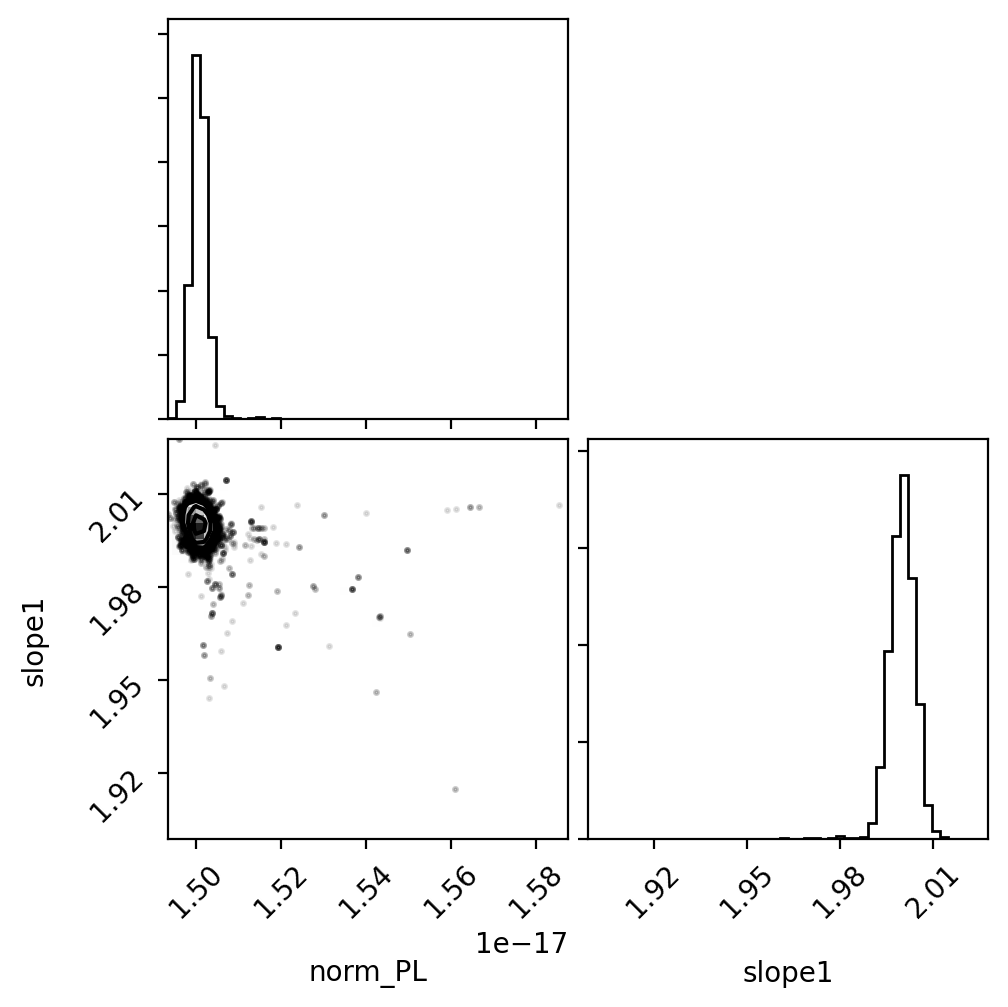

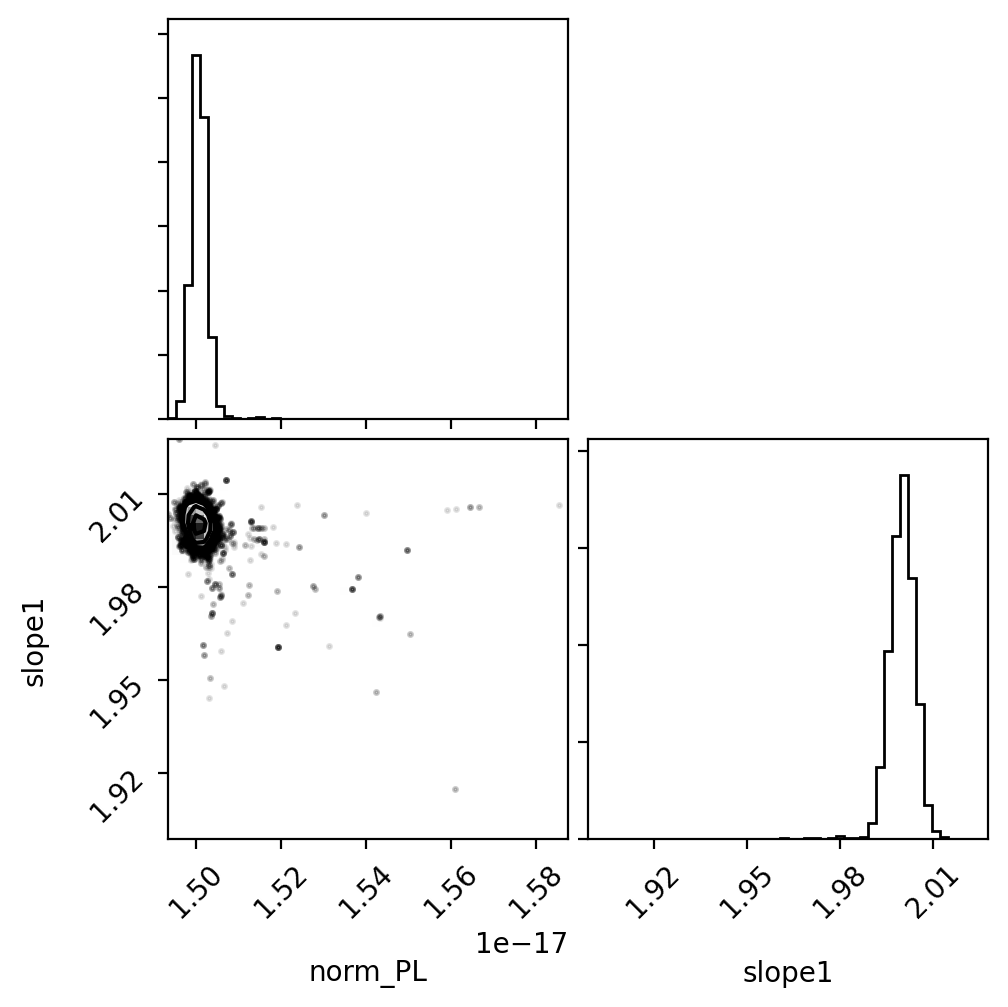

In [85]:
from spamm.analysis import corner, plot_chains, plot_posteriors_pdf
corner(S.samples, labels=S.model_parameter_names)

#### Chain plot

This shows the accepted value of each parameter as a function of chain iteration.

Plotting the MCMC chains.


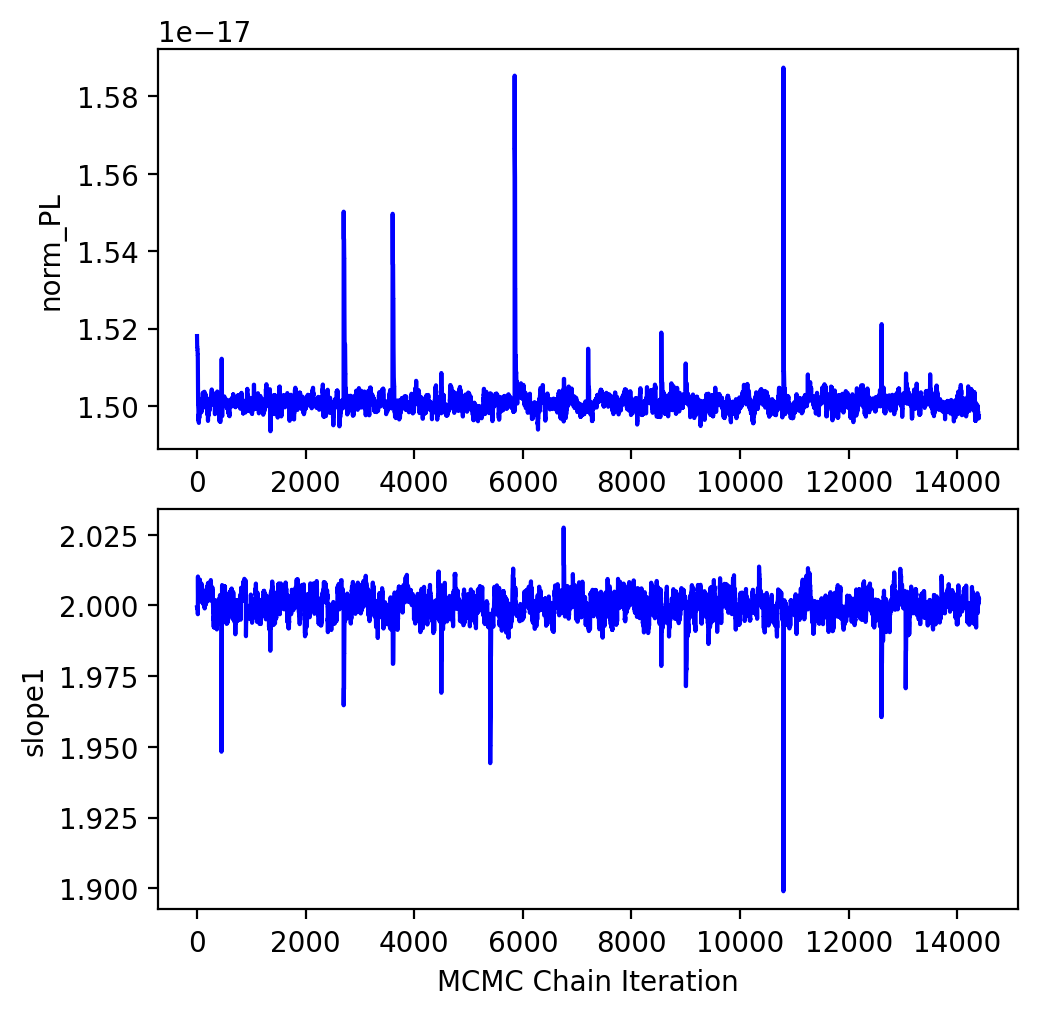

<Figure size 640x480 with 0 Axes>

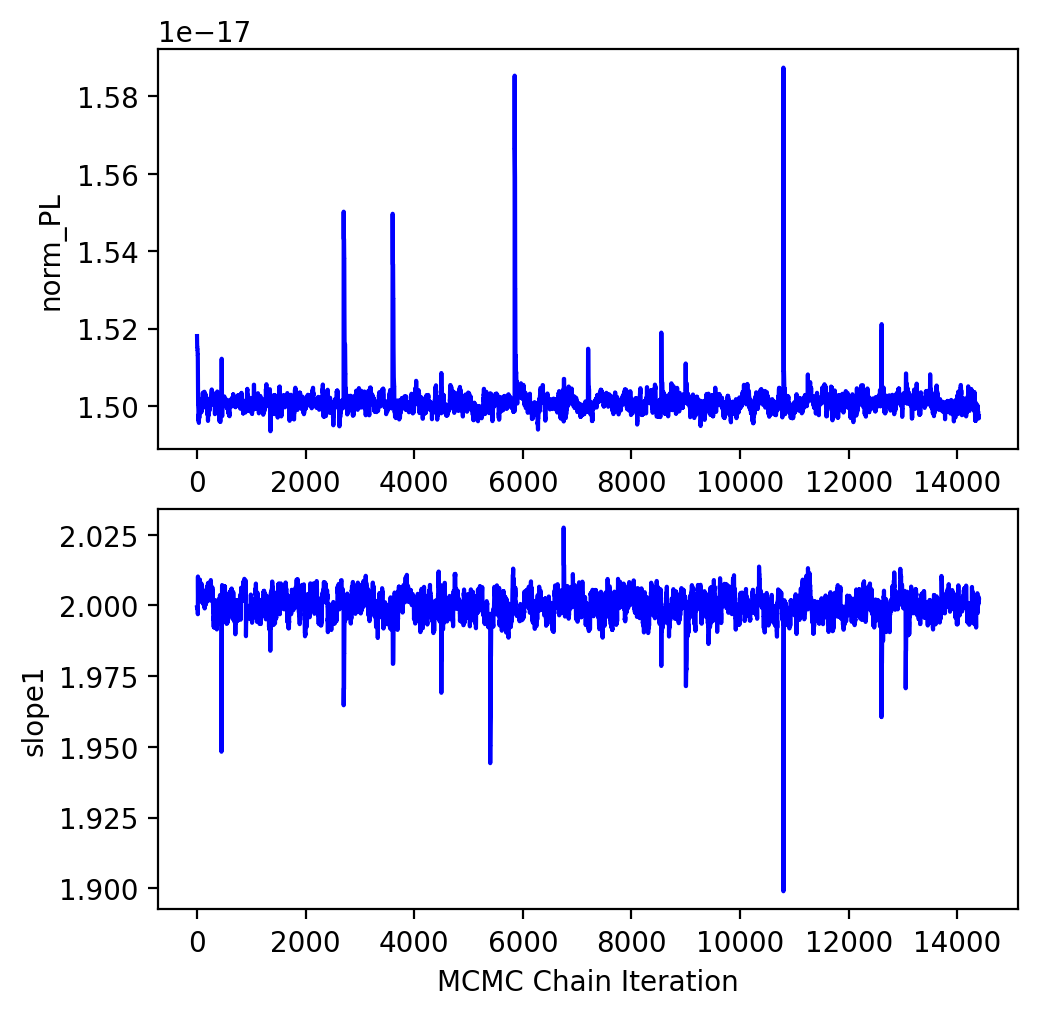

In [86]:
plot_chains(S.samples, labels=S.model_parameter_names)

#### Posterior plot

Each page in this output `.pdf` file shows a histogram for each component parameter. Overplotted are lines signifying the mean, median, mode, and maximum of the distribution. The 1$\sigma$ limits are also shown. 

In [87]:
#plot_posteriors_pdf(S)

In [88]:
S.samples

array([[1.51807483e-17, 1.99933978e+00],
       [1.51602873e-17, 1.99890917e+00],
       [1.51602873e-17, 1.99890917e+00],
       ...,
       [1.49736400e-17, 2.00272944e+00],
       [1.49736400e-17, 2.00272944e+00],
       [1.49736400e-17, 2.00272944e+00]])

Let's inspect the final model, evaluated using the mean as an estimator:

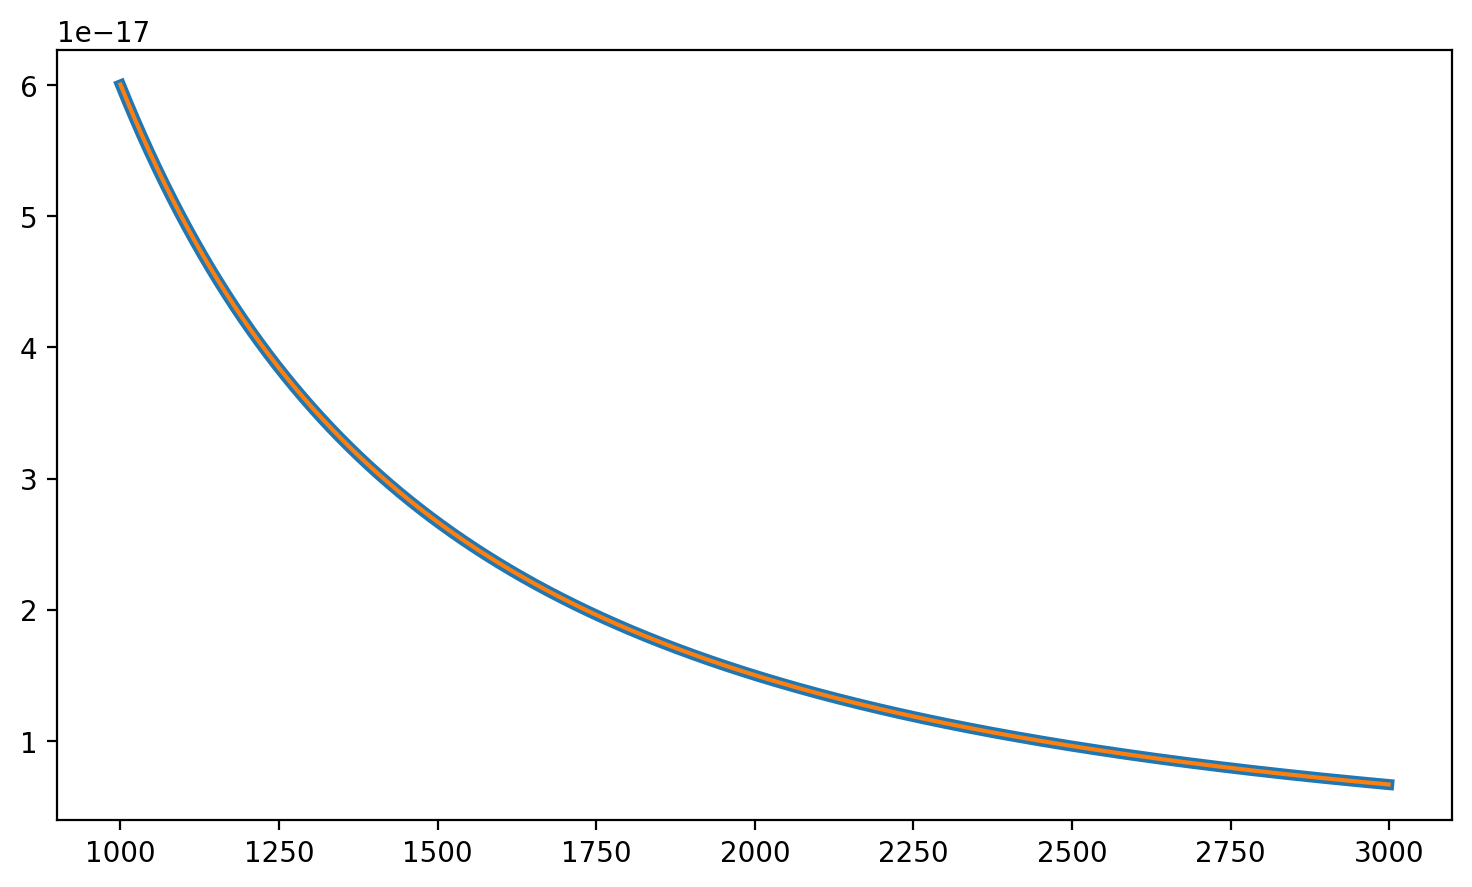

In [90]:
fig = plt.figure(figsize=(9,5))
mean_vals = np.mean(S.samples, axis=0)

plt.plot(wavelength, flux, lw=4)
plt.plot(wavelength, powerlaw(x=wavelength, amplitude=mean_vals[0], alpha=mean_vals[1]));